<a href="https://colab.research.google.com/github/choibumku00/Kaggle_Titanic/blob/main/%EC%BA%90%EA%B8%80_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df=pd.read_csv("https://raw.githubusercontent.com/CodeDiary18/Titanic-Machine-Learning-from-Disaster/main/titanic/train.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


생존은 평균이 0.383838이므로 38.38%가 생존

In [ ]:
#생존자 수
891 * 0.383838

341.999658

## 클래스별 생존 확률

In [ ]:
Pclass_group = df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False)
Pclass_percent = Pclass_group.mean()
Pclass_sort = Pclass_percent.sort_values(by='Survived', ascending=False)
Pclass_sort

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


1등석 사람들이 62%로 가장 높은 **확률로** 살아남고
3등석 사람들이 가장 높은 **확률로** 죽었다.

In [ ]:
# 클래스별 명수
Pclass_count = Pclass_group.count()
Pclass_count

,Pclass,Survived
0,1,216
1,2,184
2,3,491


In [ ]:
# 1등석 생존 명수
Pclass_count.iloc[0,1]*0.629630

136.00008

In [ ]:
# 2등석 생존 명수
Pclass_count.iloc[1,1]*0.472826

86.999984

In [ ]:
# 3등석 생존 명수
Pclass_count.iloc[2,1]*0.242363

119.000233

확률말고도 사람 명수를 봐도 1등석이 많이 살았다.

## 성별별 생존 확률

In [ ]:
sex_group = df[["Sex", "Survived"]].groupby(['Sex'], as_index=False)
sex_percent = sex_group.mean()
sex_sort = sex_percent.sort_values(by='Survived', ascending=False)
sex_sort

,Sex,Survived
0,female,0.742038
1,male,0.188908


여자는 높은 확률로 살아남고
남자는 높은 확률로 죽었다.

In [ ]:
# 성별 명수
sex_count = sex_group.count()
sex_count

,Sex,Survived
0,female,314
1,male,577


In [ ]:
# 여자 생존 명수
sex_count.iloc[0,1]*0.742038

232.999932

In [ ]:
# 남자 생존 명수
sex_count.iloc[1,1]*0.188908

108.999916

## 나이별 생존 확률

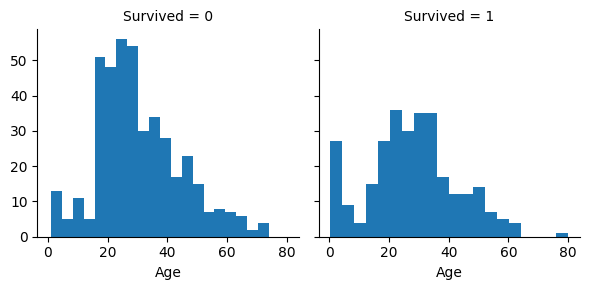

In [ ]:
# 열(col)을 생존 여부로 나눔
age_Grid = sns.FacetGrid(df, col='Survived')
# 히스토그램으로 시각화, 연령의 분포를 확인, 히스토그램 bin을 20개로 설정
age_Grid.map(plt.hist, 'Age', bins=20)

# 선형회귀

In [13]:
# 결측값 제거
df_cleaned = df.dropna()

df_cleaned.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [24]:
# 선형 회귀 분석에 대한 계수를 계산하는 함수
def linear_regression_coefficients(X, y):
    # 모형에 절편을 포함할 열 추가
    X = np.c_[np.ones(X.shape[0]), X]

    # 정규 방정식을 사용한 계수 계산
    coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return coefficients

# 선형 회귀 분석을 사용하여 값을 예측하는 함수
def linear_regression_predict(X, coefficients):
    # 모형에 절편을 포함할 열 추가
    X = np.c_[np.ones(X.shape[0]), X]
    return X.dot(coefficients)

In [25]:
# 선형 회귀를 위한 데이터 준비
X_linear_cleaned = df_cleaned['Age'].values.reshape(-1, 1)
y_linear_cleaned = df_cleaned['Survived'].values

# 선형 회귀 계수 계산
coefficients_linear_cleaned = linear_regression_coefficients(X_linear_cleaned, y_linear_cleaned)

# 선형 회귀를 사용한 생존율 예측
predicted_linear_cleaned = linear_regression_predict(X_linear_cleaned, coefficients_linear_cleaned)

# 계수 표시
coefficients_linear_cleaned


array([ 0.94487719, -0.00764542])

In [27]:
# 시그모이드 함수
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 기울기 하강법을 사용하여 로지스틱 회귀 분석의 계수를 계산하는 함수
def logistic_regression_coefficients(X, y, learning_rate, iterations):
    # 모형에 절편을 포함할 열 추가
    X = np.c_[np.ones(X.shape[0]), X]

    # 계수를 0으로 초기화
    coefficients = np.zeros(X.shape[1])

    # Gradient Descent
    for _ in range(iterations):
        # Predict current values
        predictions = sigmoid(X.dot(coefficients))

        # 현재 값 예측
        gradient = X.T.dot(predictions - y) / y.size

        # 계수 업데이트
        coefficients -= learning_rate * gradient

    return coefficients

# 로지스틱 회귀 분석을 사용하여 값을 예측하는 함수
def logistic_regression_predict(X, coefficients):
    # 모형에 절편을 포함할 열 추가
    X = np.c_[np.ones(X.shape[0]), X]
    return sigmoid(X.dot(coefficients))

In [28]:
# 로지스틱 회귀 분석을 위한 하이퍼파라미터 설정
learning_rate = 0.01
iterations = 1000

# 로지스틱 회귀를 위한 데이터 준비
X_logistic_cleaned = df_cleaned['Age'].values.reshape(-1, 1)
y_logistic_cleaned = df_cleaned['Survived'].values

# 로지스틱 회귀 계수 계산
coefficients_logistic_cleaned = logistic_regression_coefficients(X_logistic_cleaned, y_logistic_cleaned, learning_rate, iterations)

# 로지스틱 회귀를 사용한 생존 확률 예측
predicted_logistic_cleaned = logistic_regression_predict(X_logistic_cleaned, coefficients_logistic_cleaned)

# 계수 표시
coefficients_logistic_cleaned


array([ 0.49573297, -0.02072623])

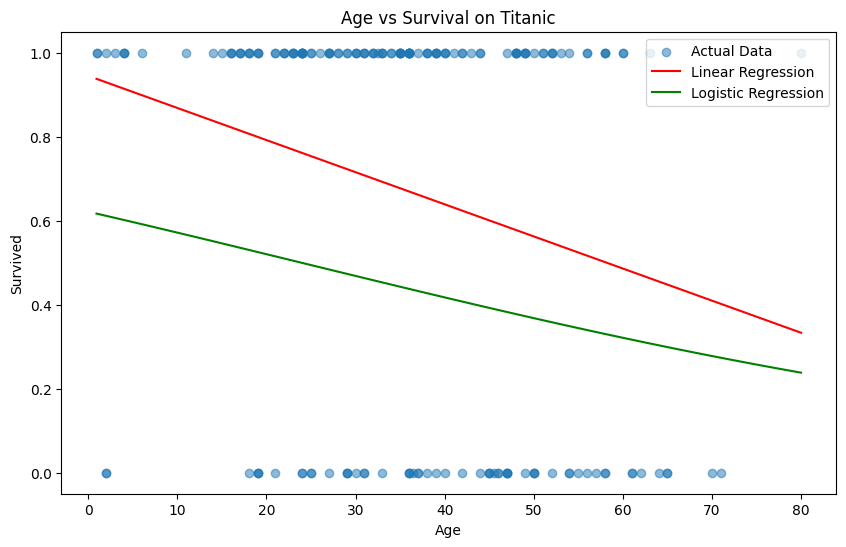

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Age'], df_cleaned['Survived'], alpha=0.5, label='Actual Data')

ages = np.linspace(df_cleaned['Age'].min(), df_cleaned['Age'].max(), 100)
predicted_linear_plot = linear_regression_predict(ages.reshape(-1, 1), coefficients_linear_cleaned)
plt.plot(ages, predicted_linear_plot, color='red', label='Linear Regression')

predicted_logistic_plot = logistic_regression_predict(ages.reshape(-1, 1), coefficients_logistic_cleaned)
plt.plot(ages, predicted_logistic_plot, color='green', label='Logistic Regression')

plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Age vs Survival on Titanic')
plt.legend()
plt.show()
